In [60]:
import pymc3 as pm
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import theano.tensor as tt
import pickle
%matplotlib inline

In [2]:
FILE_NEXT_TO_GO = 'next_to_go.pkl'
with open(FILE_NEXT_TO_GO, 'rb') as f:
    meeting = pickle.load(f)
print(meeting.keys())
horses = meeting['runners']

dict_keys(['raceNumber', 'raceName', 'raceDistance', 'trackDirection', 'meeting', 'skyRacing', 'hasParimutuel', 'hasFixedOdds', 'broadcastChannel', 'broadcastChannels', 'hasForm', 'hasEarlySpeedRatings', 'allIn', 'cashOutEligibility', 'allowBundle', 'willHaveFixedOdds', 'fixedOddsOnlineBetting', 'raceStartTime', 'raceClassConditions', 'apprenticesCanClaim', 'prizeMoney', 'raceStatus', 'substitute', 'results', 'pools', 'allowMulti', 'allowParimutuelPlace', 'parimutuelPlaceStatus', 'allowFixedOddsPlace', 'numberOfPlaces', 'numberOfFixedOddsPlaces', 'runners', 'oddsUpdateTime', 'fixedOddsUpdateTime', 'tips', 'ratings', 'multiLegApproximates', 'betTypes'])


In [3]:
engine = create_engine('sqlite:///tab.db')
conn = engine.connect()
conn
dfo = pd.read_sql_table('race', conn)
print(dfo.columns)

Index(['id', 'runner_name', 'sire', 'dam', 'age', 'sex', 'colour', 'trainer',
       'trainer_location', 'start_type', 'raced_at', 'race_number',
       'finishing_position', 'number_of_starters', 'draw', 'margin', 'venue',
       'audio', 'video', 'distance', 'class_', 'handicap', 'rider',
       'starting_position', 'odds', 'winner_or_second', 'position_in_run',
       'track_condition', 'time'],
      dtype='object')


In [29]:
df = dfo[['odds', 'finishing_position', 'number_of_starters']]
# print(df.odds.head())
# print(df.finishing_position.head())
print(len(df))
df = df[(df.odds > 0)]
df['finishing_position'] = df.finishing_position.astype(int)
df = df[(df.finishing_position > 0)]
df = df[(df.number_of_starters > 0)]
# print(df.finishing_position.head())
print(len(df))

2735
2613


count    2613.000000
mean       22.174474
std        26.420664
min         1.400000
25%         6.000000
50%        12.000000
75%        26.000000
max       201.000000
Name: odds, dtype: float64

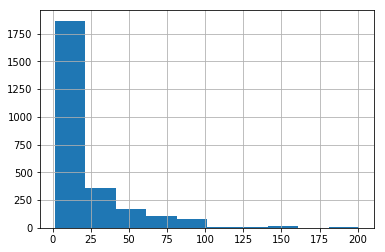

In [50]:
x0 = df['odds']
x0.hist()
x0.describe()

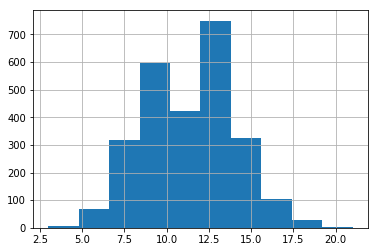

In [51]:
x1 = df['number_of_starters']
x1.hist()
# x1.head()

/Users/jaco/.pyenv/versions/3.6.1/envs/tabby/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count    2613.000000
mean        0.141217
std         0.348312
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: finishing_position, dtype: float64

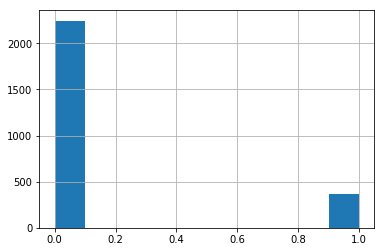

In [52]:
y = df['finishing_position']
y[y > 1] = 0
y.hist()
y.describe()

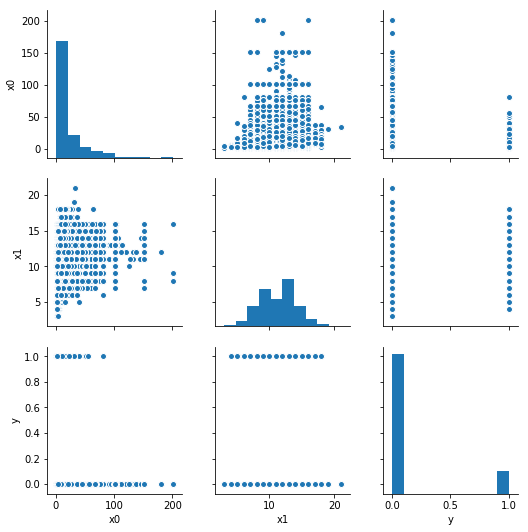

In [53]:
data = pd.DataFrame()
data['x0'] = x0
data['x1'] = x1
data['y'] = y
sns.pairplot(data)

In [58]:
# with pm.Model() as model:
#     pm.glm.GLM.from_formula('y ~ x0 + x1', data, family=pm.glm.families.Binomial())
#     start = pm.find_MAP()
#     step = pm.NUTS()
#     trace = pm.sample(1000, start=start, step=step)

In [59]:
# with pm.Model() as model:
#     # hyperpriors
#     alpha = pm.Normal('alpha', mu=0, sd=10)
#     beta = pm.Normal('beta', mu=0, sd=10, shape=2)

#     # priors
#     mu = alpha + pm.math.dot(X, beta)
#     theta = pm.Deterministic('theta', 1 / (1 + pm.math.exp(-mu)))
    
#     # logistic boundary
#     bd = pm.Deterministic('bd', -alpha/beta[1] -beta[0]/beta[1] * X['x0'])

#     # likelihood
#     yl = pm.Bernoulli('yl', theta, observed=y)
    
#     start = pm.find_MAP()
#     step = pm.NUTS()
#     trace = pm.sample(5000, start=start, step=step)

In [64]:
# with pm.Model() as model:
#     beta0 = pm.Cauchy('beta0', 0., 10.0)
#     beta1 = pm.Cauchy('beta1', 0., 2.5)

#     # logit
#     logit_p =  (beta0*x0 + beta1*x1)
#     p = pm.math.exp(logit_p) / (1 + pm.math.exp(logit_p))

#     # likelihood
#     likelihood = pm.Binomial('likelihood', n=1, p=p, observed=y)

#     # inference
#     start = pm.find_MAP()
#     step = pm.NUTS(scaling=start)
#     trace = pm.sample(1000, step=step)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118d319b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11bf89198>]], dtype=object)

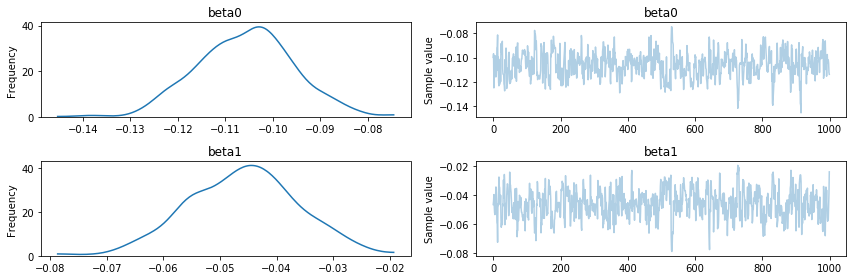

In [62]:
pm.traceplot(trace)

In [63]:
pm.df_summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
beta0,-0.105816,0.010220,0.000596,-0.124363,-0.085379
beta1,-0.045919,0.009668,0.000531,-0.064478,-0.027373


In [43]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# plt.scatter(X, Y, label='data')
# pm.plot_posterior_predictive(trace, samples=50, eval=X,
#                               label='posterior predictive regression lines')

In [44]:
# pm.effective_n(trace)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116fa0940>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x116ae2390>]], dtype=object)

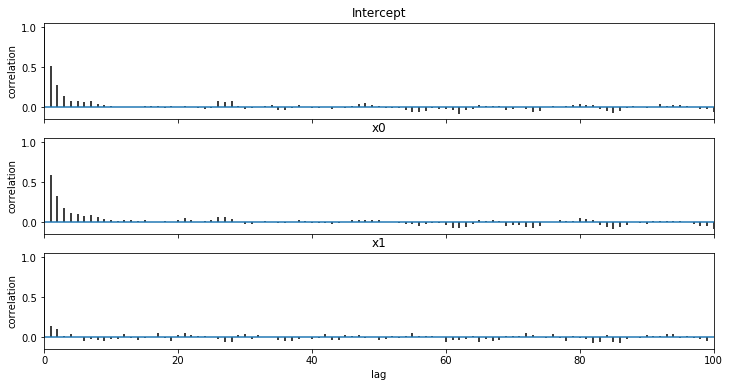

In [45]:
pm.autocorrplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11674fc50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x116adb0f0>], dtype=object)

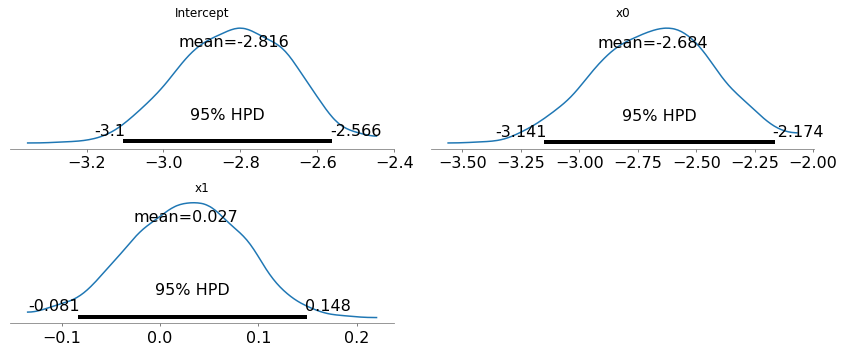

In [46]:
pm.plot_posterior(trace, kde_plot=True)

In [ ]:
n = len(horses)
print('Values for {} horse race:'.format(n))
for horse in horses:
    name = horse['runnerName']
    odds = horse['fixedOdds']['returnWin']
    
    y = -0.72 + -0.10 * odds + 0.01 * n
    print('{} {}: {:.2f}'.format(name, odds, y))
#     break